In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import os
import cv2
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, LSTM, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix


In [4]:
# Load Spectrogram Train-test data
spec_file = np.load(os.getcwd()+"/new_spectrogram_train_test.npz")

# Model 1 for Spectrogram
S_train = spec_file['S_train']
S_test = spec_file['S_test']
y_train = spec_file['y_train']
y_test = spec_file['y_test']

model = Sequential()
model.add(Conv2D(8, (3,3), activation= 'relu', input_shape= S_train[0].shape, padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(16, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(32, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy')

model.summary()

# Train Model 1

checkpoint = ModelCheckpoint(os.getcwd()+"/models/new_spec_model_spectrogram1_{epoch:03d}.keras")

model.fit(S_train, y_train, epochs= 100, callbacks= [checkpoint], batch_size= 32, verbose= 1)
model.save(os.getcwd() + "/models/new_spec_model_spectrogram1.keras")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 1025, 1293, 8)  │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 257, 324, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 257, 324, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 65, 81, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 65, 81, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 17, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,114 (402.79 KB)

 Trainable params: 103,114 (402.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 73s 830ms/step - loss: 2.2962
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - loss: 1.9756
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 701ms/step - loss: 1.7741
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 679ms/step - loss: 1.7320
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 680ms/step - loss: 1.7080
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 684ms/step - loss: 1.5825
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 674ms/step - loss: 1.5645
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 679ms/step - loss: 1.4352
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 678ms/step - loss: 1.5054
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 678ms/step - loss: 1.4426
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 673ms/step - loss: 1.3449
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 676ms/step - loss: 1.2922
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 674ms/step - loss: 1.2812
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 679ms/step - loss: 1.0936
Epoch 15/100
24/24 ━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step
Train Accuracy:  755 / 755  =  100.0 %
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
Test Accuracy:  142 / 189  =  75.13 %


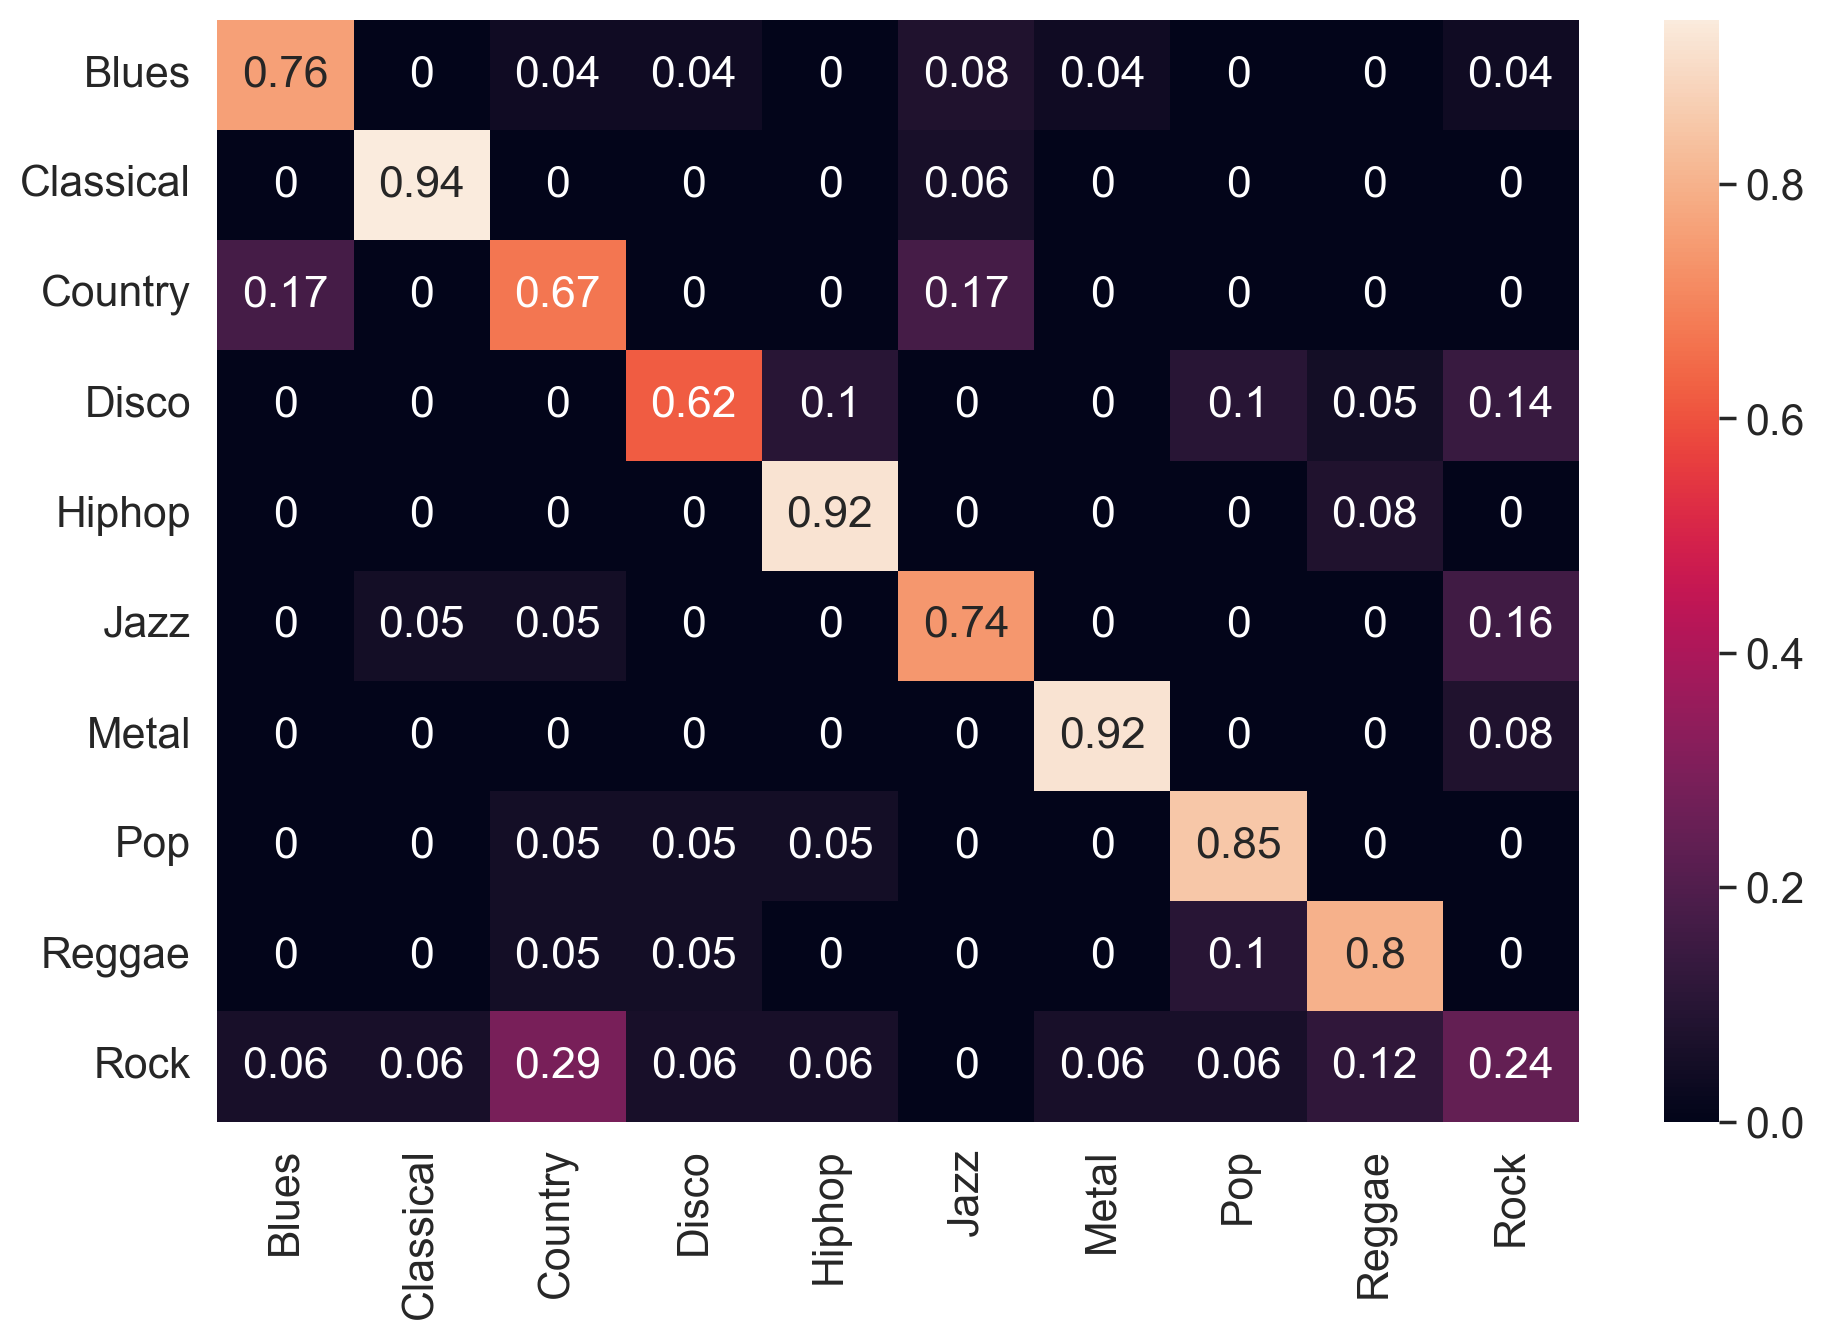

In [11]:
model = load_model(os.getcwd() + "/models/new_spec_model_spectrogram1.keras")

# Training Accuracy
y_pred = model.predict(S_train)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_train, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Train Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

# # Testing Accuracy
y_pred = model.predict(S_test)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_test, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Test Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_true, y_pred, normalize= 'true')
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)

plt.figure(figsize = (10,7), dpi = 200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/new_spec_conf_mat1.png")

In [14]:
# Spectrogram Model 2

S_train = spec_file['S_train']
S_test = spec_file['S_test']
y_train = spec_file['y_train']
y_test = spec_file['y_test']

model = Sequential()
model.add(Conv2D(8, (3,3), activation= 'relu', input_shape= S_train[0].shape, padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(16, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(32, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy')

model.summary()

# Train Model 2

checkpoint = ModelCheckpoint(os.getcwd()+"/models/new_spec_model_spectrogram2_{epoch:03d}.keras")

model.fit(S_train, y_train, epochs= 100, callbacks= [checkpoint], batch_size= 32, verbose= 1)
model.save(os.getcwd() + "/models/new_spec_model_spectrogram2.keras")

model = load_model(os.getcwd() + "/models/new_spec_model_spectrogram2.keras")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 1025, 1293, 8)  │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 257, 324, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 257, 324, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 65, 81, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 65, 81, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 17, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 5, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,114 (402.79 KB)

 Trainable params: 103,114 (402.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 2.2895
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 751ms/step - loss: 2.0364
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 737ms/step - loss: 1.7416
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - loss: 1.7003
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 695ms/step - loss: 1.6622
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 689ms/step - loss: 1.6731
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 691ms/step - loss: 1.5840
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 689ms/step - loss: 1.5284
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 697ms/step - loss: 1.4154
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 691ms/step - loss: 1.4264
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - loss: 1.2963
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - loss: 1.2563
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - loss: 1.1573
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - loss: 1.2083
Epoch 15/100
24/24 ━━━━━━━━━━━━━

ValueError: operands could not be broadcast together with shapes (189,) (755,) 

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step
Training Accuracy:  755 / 755  =  100.0 %
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step
Testing Accuracy:  134 / 189  =  70.89999999999999 %


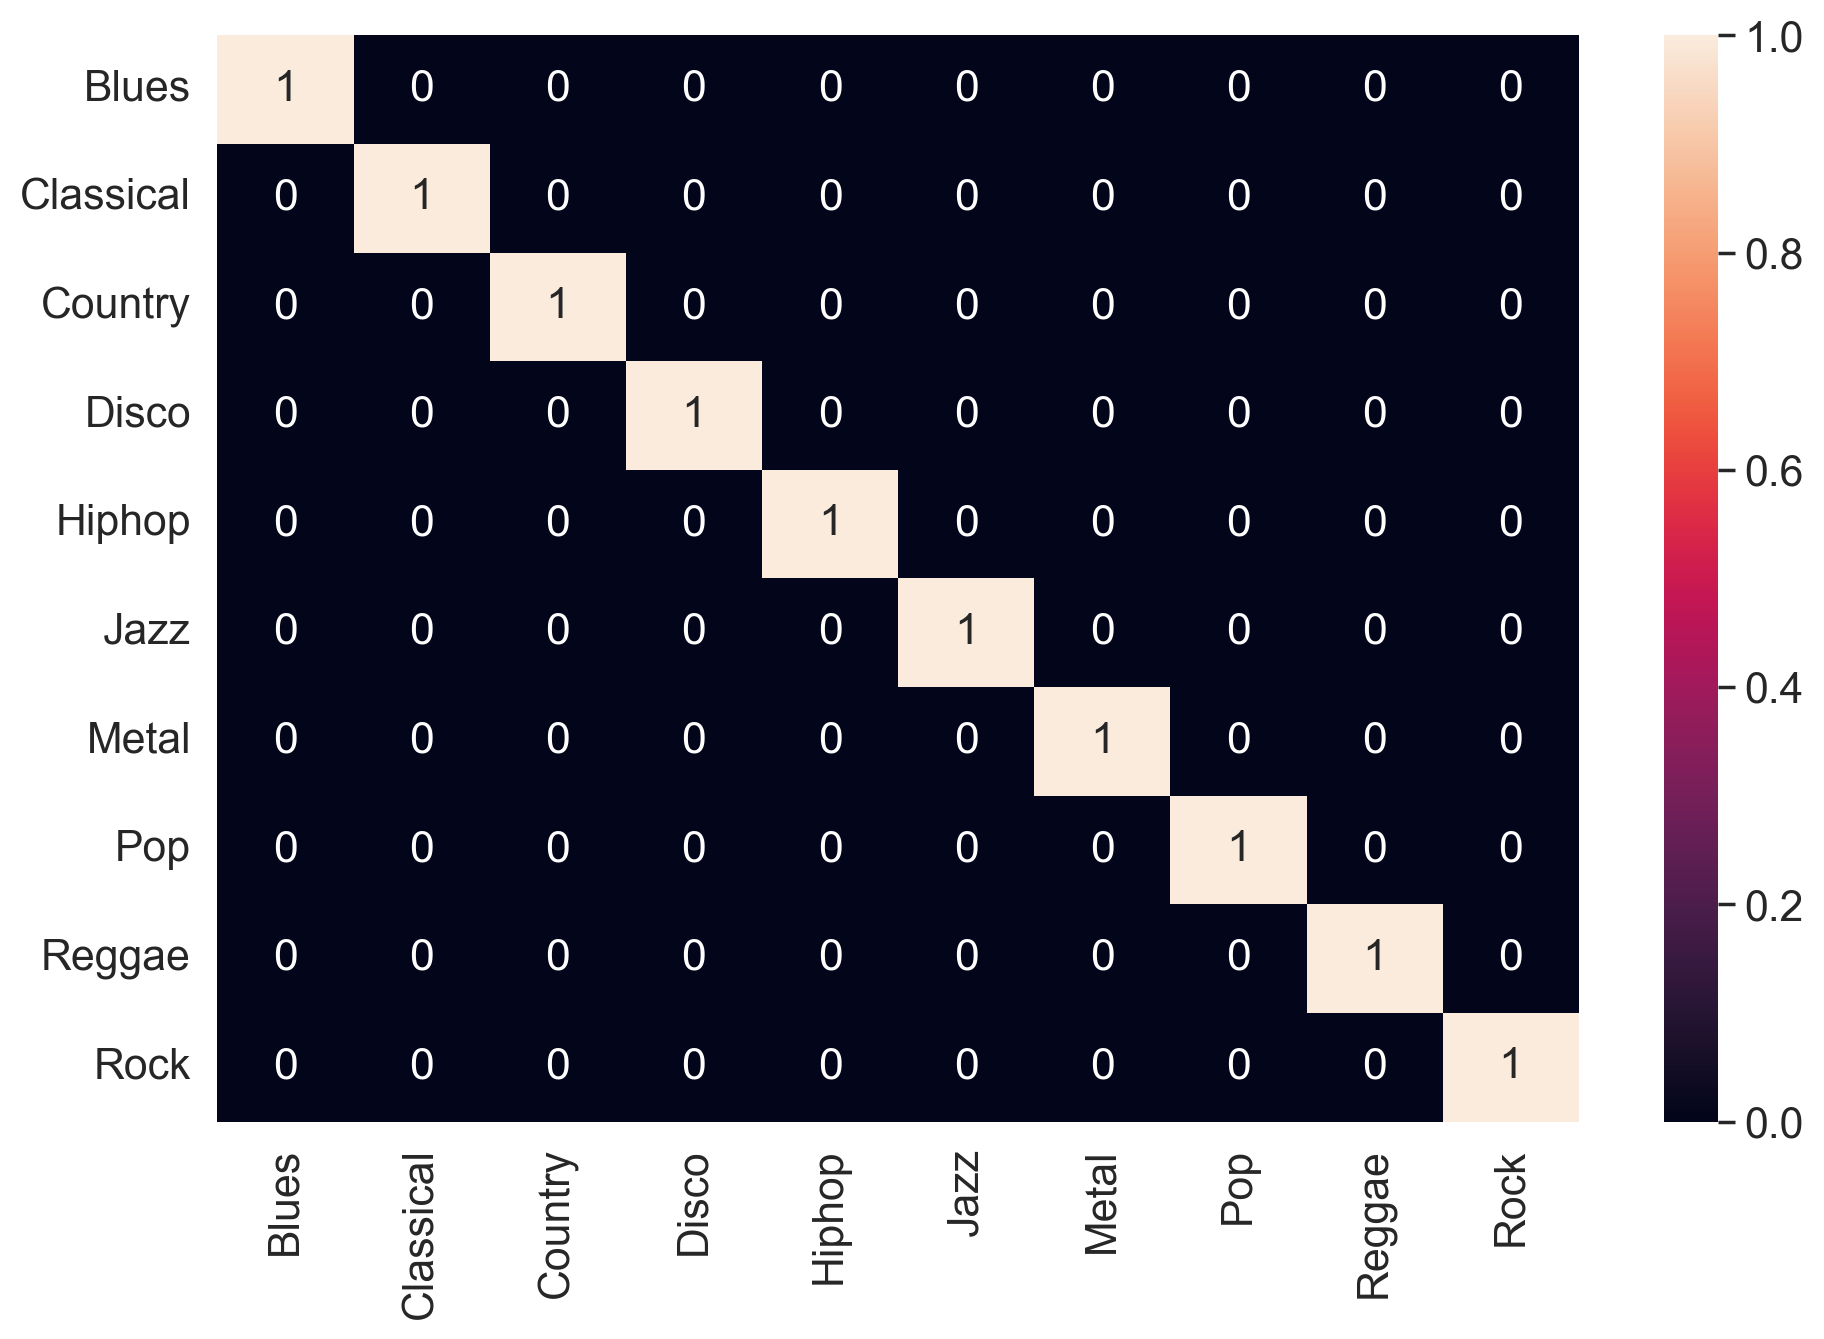

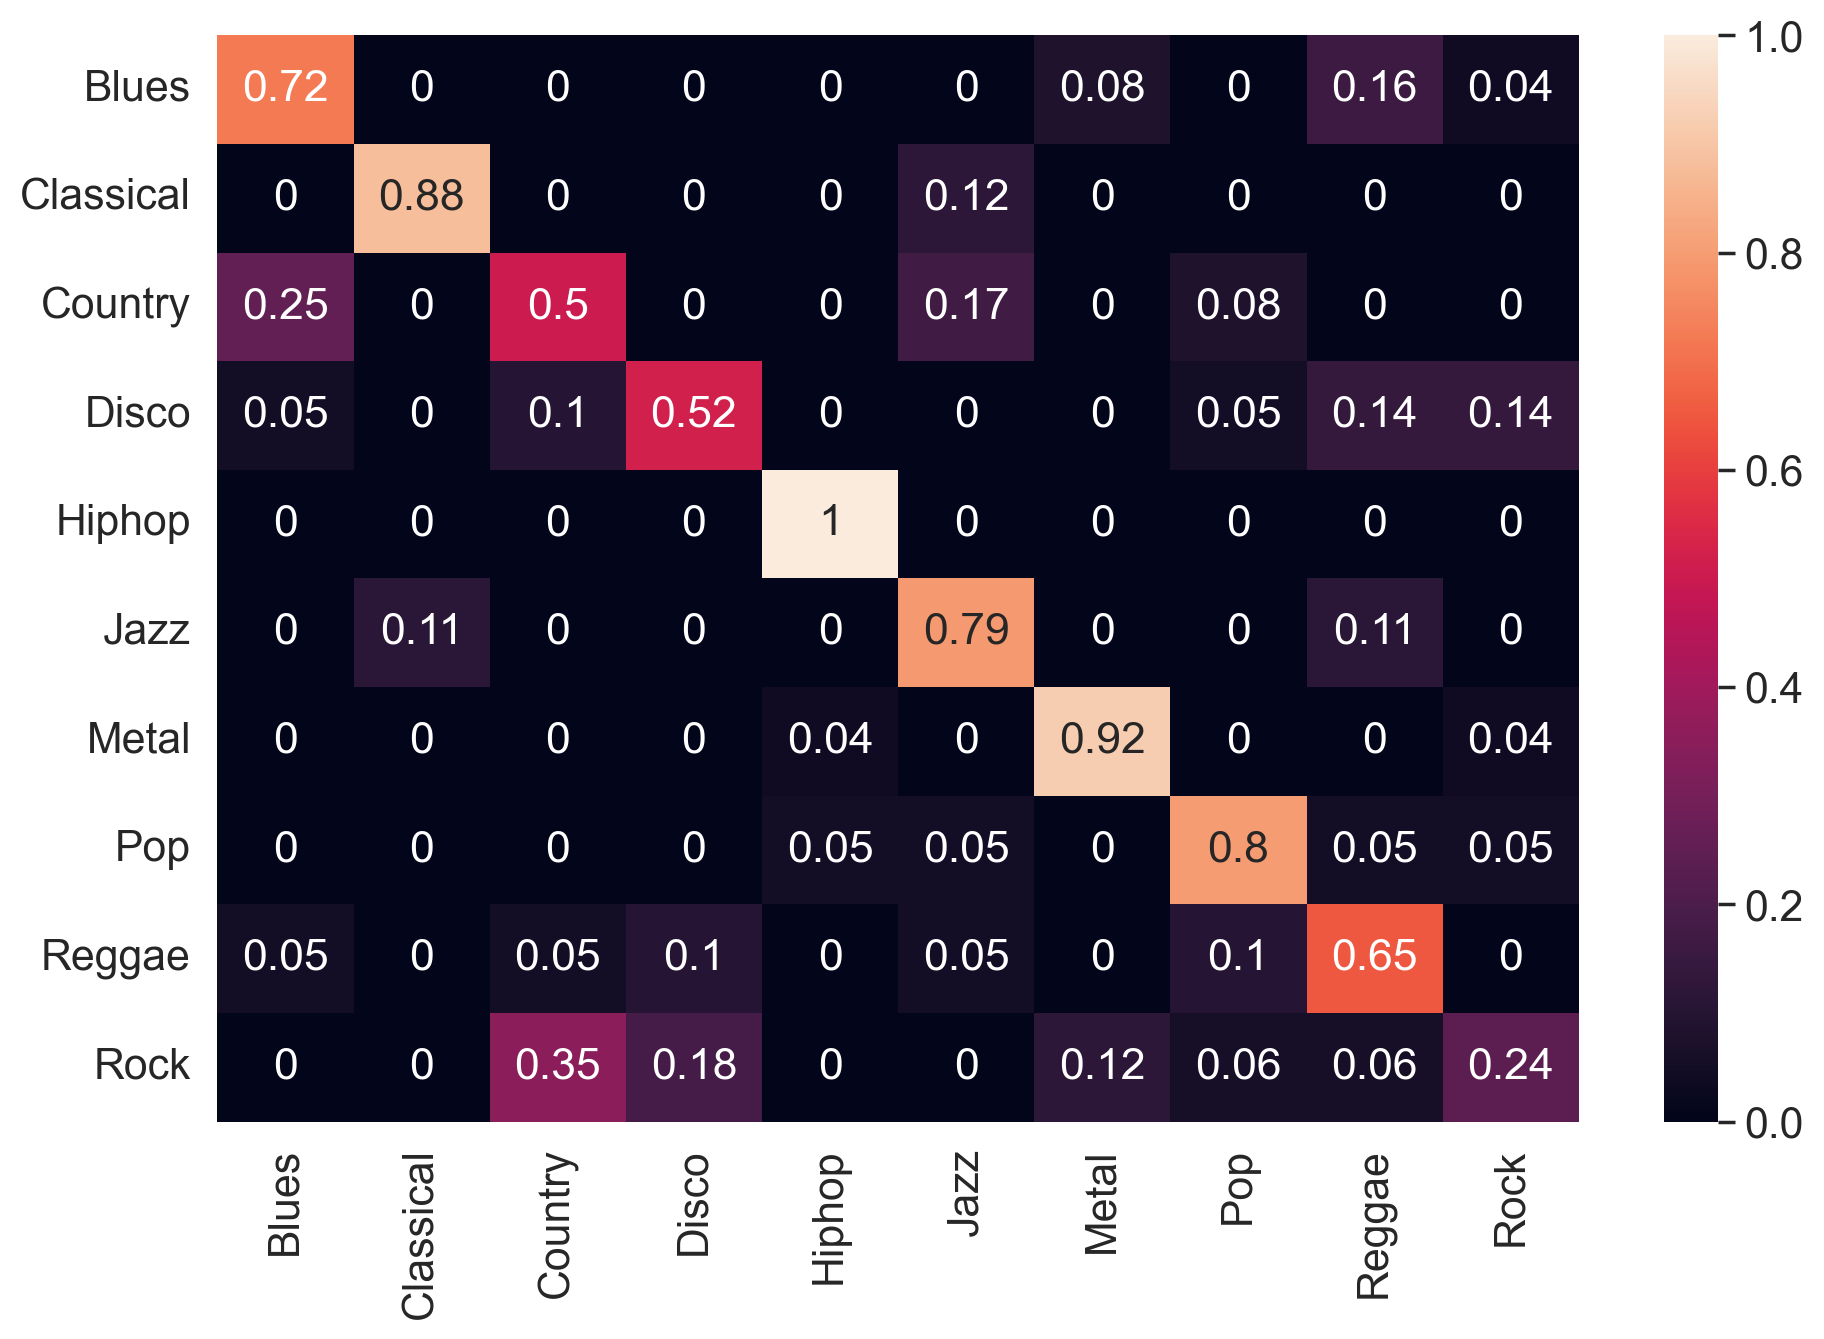

In [16]:
# Training Accuracy
y_pred_train = model.predict(S_train)
y_pred_train = np.argmax(y_pred_train, axis=-1)
y_true_train = np.argmax(y_train, axis=-1)

correct_train = len(y_pred_train) - np.count_nonzero(y_pred_train - y_true_train)
acc_train = correct_train / len(y_pred_train)
acc_train = np.round(acc_train, 4) * 100

print("Training Accuracy: ", correct_train, "/", len(y_pred_train), " = ", acc_train, "%")

# Testing Accuracy
y_pred_test = model.predict(S_test)
y_pred_test = np.argmax(y_pred_test, axis=-1)
y_true_test = np.argmax(y_test, axis=-1)

correct_test = len(y_pred_test) - np.count_nonzero(y_pred_test - y_true_test)
acc_test = correct_test / len(y_pred_test)
acc_test = np.round(acc_test, 4) * 100

print("Testing Accuracy: ", correct_test, "/", len(y_pred_test), " = ", acc_test, "%")

# Confusion Matrix
class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat_train = confusion_matrix(y_true_train, y_pred_train, normalize='true')
conf_mat_train = np.round(conf_mat_train, 2)

conf_mat_df_train = pd.DataFrame(conf_mat_train, columns=class_names, index=class_names)

plt.figure(figsize=(10, 7), dpi=200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df_train, annot=True, annot_kws={"size": 16})  # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/train_confusion_matrix.png")

# Confusion Matrix for Testing
conf_mat_test = confusion_matrix(y_true_test, y_pred_test, normalize='true')
conf_mat_test = np.round(conf_mat_test, 2)

conf_mat_df_test = pd.DataFrame(conf_mat_test, columns=class_names, index=class_names)

plt.figure(figsize=(10, 7), dpi=200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df_test, annot=True, annot_kws={"size": 16})  # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/test_confusion_matrix.png")


In [4]:
# Load MFCC file
mfcc_file = np.load(os.getcwd()+"/new_mfcc_train_test.npz")
mfcc_train = mfcc_file['mfcc_train']
mfcc_test = mfcc_file['mfcc_test']
y_train = mfcc_file['y_train']
y_test = mfcc_file['y_test']

# Define model for MFCC
def get_model() :

    model = Sequential()
    model.add(Conv2D(16, (3,3), input_shape= mfcc_train[0].shape, activation= 'tanh', padding= 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((4,6), padding= 'same'))
    model.add(Conv2D(32, (3,3), input_shape= mfcc_train[0].shape, activation= 'tanh', padding= 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((4,6), padding= 'same'))
    model.add(Conv2D(64, (3,3), input_shape= mfcc_train[0].shape, activation= 'tanh', padding= 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((4,6), padding= 'same'))
    model.add(Flatten())
    # model.add(Dense(256, activation= 'tanh'))
    model.add(Dense(256, activation= 'tanh'))
    model.add(Dense(64, activation= 'tanh'))
    model.add(Dense(10, activation= 'softmax'))

    model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy')

    model.summary()

    return model

In [5]:
def get_majority(pred):
    N = len(pred[0])
    vote = []
    for i in range(N):
        candidates = [x[i] for x in pred]
        candidates = np.array(candidates)
        uniq, freq = np.unique(candidates, return_counts=True)
        vote.append(uniq[np.argmax(freq)])
    return np.array(vote)

def train_and_save_model(model, mfcc_train, y_train, model_save_path, n_splits=10, epochs=30, batch_size=30):
    kf = KFold(n_splits=n_splits)
    for train_index, val_index in kf.split(mfcc_train, np.argmax(y_train, axis=-1)):
        kf_mfcc_train = mfcc_train[train_index]
        kf_X_val = mfcc_train[val_index]
        kf_y_train = y_train[train_index]
        kf_y_val = y_train[val_index]

        model.fit(kf_mfcc_train, kf_y_train, validation_data=(kf_X_val, kf_y_val), epochs=epochs, batch_size=batch_size, verbose=1)
    model.save(model_save_path)

# Assuming get_model() is defined and returns a compiled model
model1 = get_model()
model2 = get_model()
model3 = get_model()

train_and_save_model(model1, mfcc_train, y_train, os.getcwd() + "/models/new_ensemble_mfcc1.h5")
train_and_save_model(model2, mfcc_train, y_train, os.getcwd() + "/models/new_ensemble_mfcc2.h5")
train_and_save_model(model3, mfcc_train, y_train, os.getcwd() + "/models/new_ensemble_mfcc3.h5")


c:\Users\jmayo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 120, 600, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 600, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 100, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 100, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 17, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 17, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 17, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,402 (544.54 KB)

 Trainable params: 139,178 (543.66 KB)

 Non-trainable params: 224 (896.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 120, 600, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 120, 600, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 100, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 100, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 17, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 17, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 17, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,402 (544.54 KB)

 Trainable params: 139,178 (543.66 KB)

 Non-trainable params: 224 (896.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 120, 600, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 120, 600, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 100, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 100, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 17, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 17, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 17, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,402 (544.54 KB)

 Trainable params: 139,178 (543.66 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - loss: 2.2538 - val_loss: 2.1745
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - loss: 1.5070 - val_loss: 2.3315
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - loss: 1.2323 - val_loss: 3.1336
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - loss: 1.1063 - val_loss: 3.0755
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - loss: 1.0276 - val_loss: 3.9484
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - loss: 0.9321 - val_loss: 4.0360
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - loss: 0.8288 - val_loss: 3.8282
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - loss: 0.6972 - val_loss: 4.3647
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - loss: 0.5904 - val_loss: 4.6178
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - loss: 0.5454 - val_loss: 4.3376
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - loss: 0.4937 - val_loss: 3.8584
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/ste

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 394ms/step - loss: 2.2304 - val_loss: 2.2310
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - loss: 1.5065 - val_loss: 1.8832
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - loss: 1.2985 - val_loss: 2.4941
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - loss: 1.1322 - val_loss: 2.6331
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - loss: 1.0149 - val_loss: 3.4212
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - loss: 1.0016 - val_loss: 3.2940
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - loss: 0.8518 - val_loss: 3.3704
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - loss: 0.7720 - val_loss: 3.3319
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - loss: 0.6459 - val_loss: 3.7607
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - loss: 0.5946 - val_loss: 4.0108
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - loss: 0.5176 - val_loss: 3.5821
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/ste

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - loss: 2.2475 - val_loss: 2.2543
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - loss: 1.6637 - val_loss: 2.0420
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - loss: 1.3379 - val_loss: 2.2477
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - loss: 1.1056 - val_loss: 2.9538
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - loss: 1.1273 - val_loss: 2.9456
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - loss: 1.0772 - val_loss: 3.2379
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - loss: 0.8457 - val_loss: 3.4290
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 368ms/step - loss: 0.7018 - val_loss: 3.8282
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - loss: 0.6606 - val_loss: 3.8339
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 368ms/step - loss: 0.5539 - val_loss: 3.5208
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - loss: 0.5716 - val_loss: 2.8898
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/ste

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
Train Accuracy:  755 / 755  =  100.0 %
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Testing Accuracy:  140 / 189  =  74.07000000000001 %


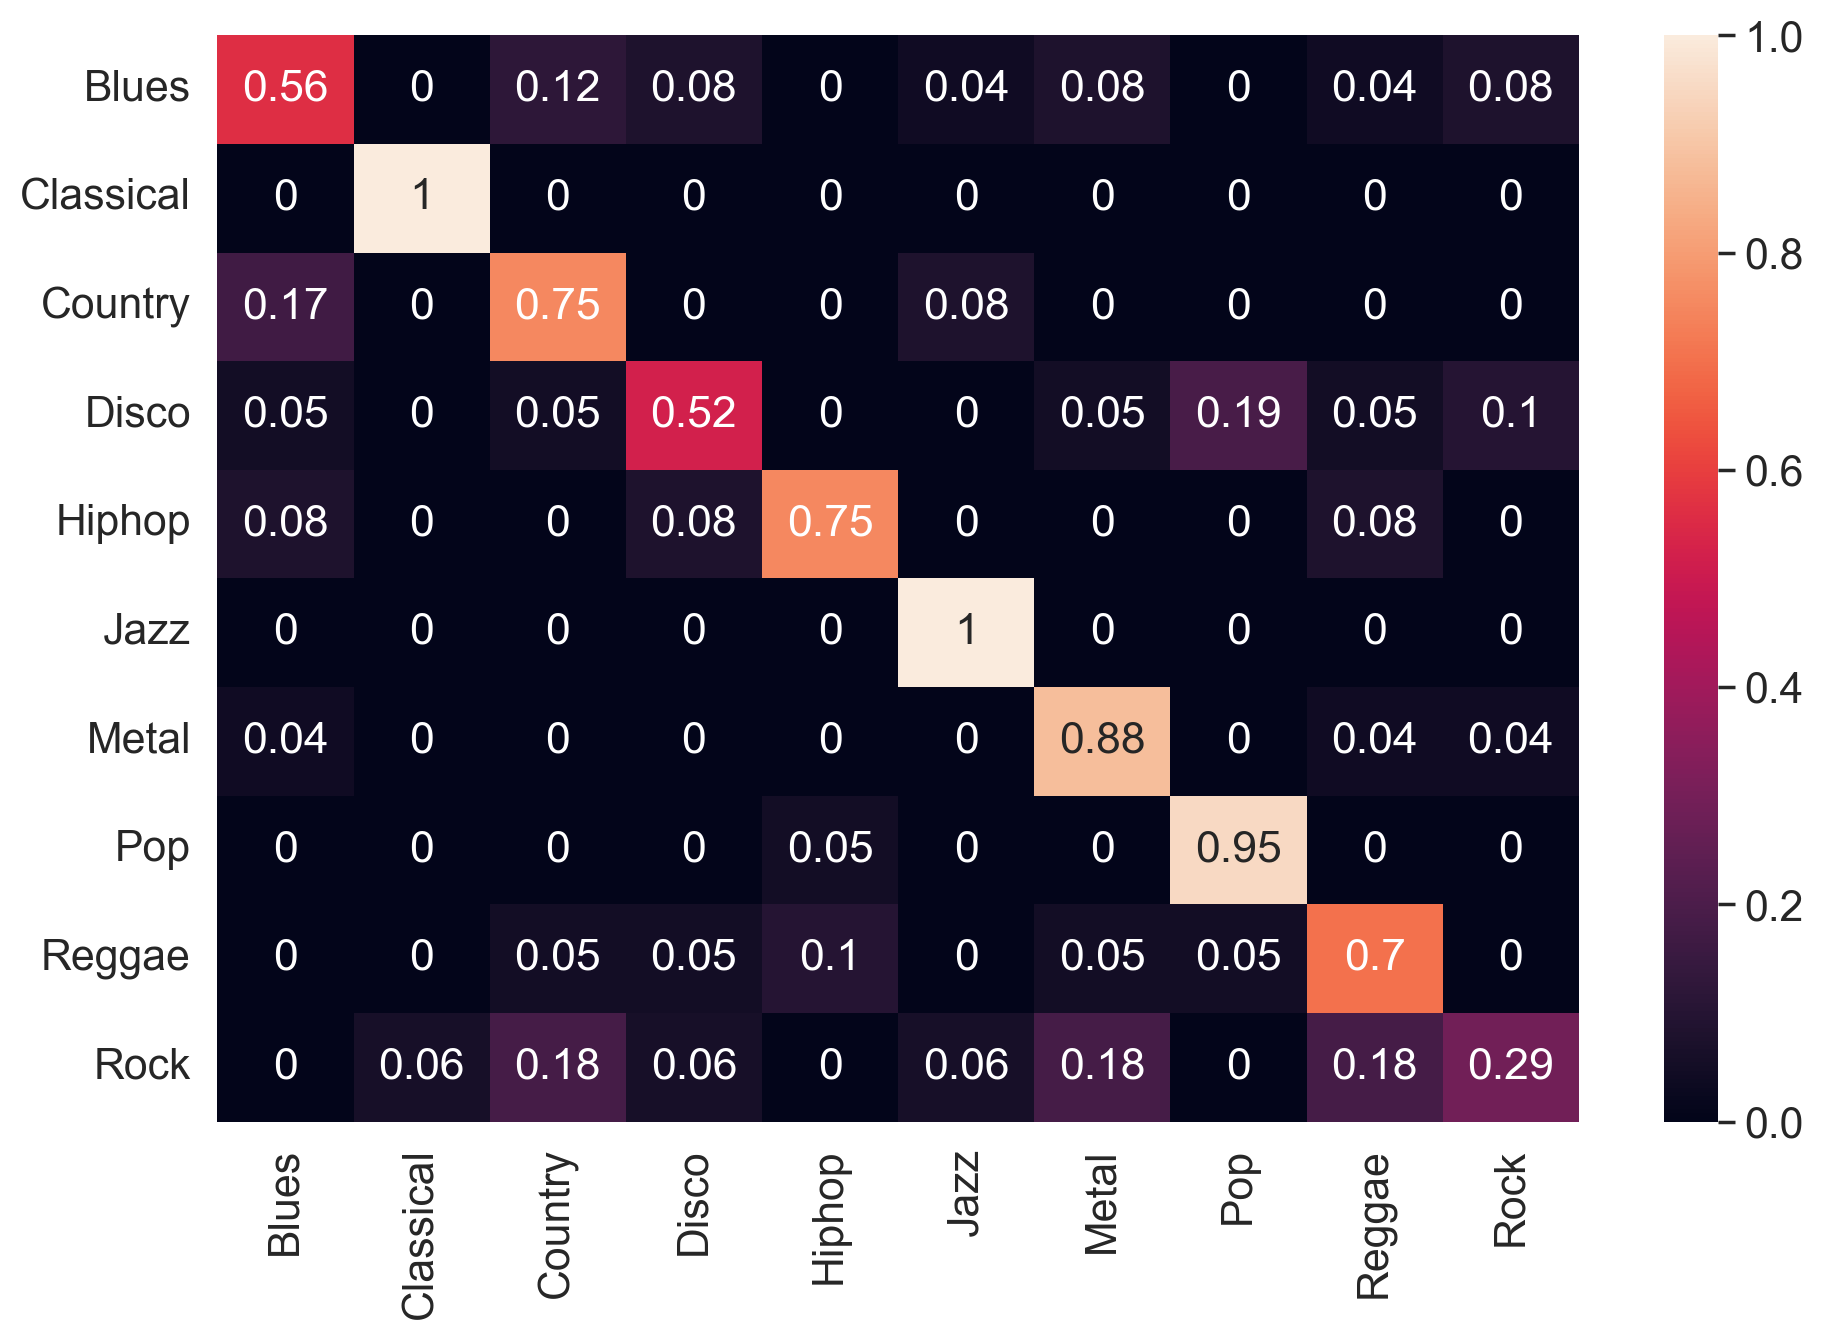

In [6]:
# Load the models
model1 = load_model(os.getcwd() + "/models/new_ensemble_mfcc1.h5")
model2 = load_model(os.getcwd() + "/models/new_ensemble_mfcc2.h5")
model3 = load_model(os.getcwd() + "/models/new_ensemble_mfcc3.h5")

# Training Accuracy
y_true = np.argmax(y_train, axis= -1)

y_pred1 = model1.predict(mfcc_train)
y_pred1 = np.argmax(y_pred1, axis= -1)

y_pred2 = model2.predict(mfcc_train)
y_pred2 = np.argmax(y_pred2, axis= -1)

y_pred3 = model3.predict(mfcc_train)
y_pred3 = np.argmax(y_pred3, axis= -1)

y_pred = [y_pred1, y_pred2, y_pred3]

y_pred = get_majority(y_pred)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Train Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

# Test Model
y_true = np.argmax(y_test, axis= -1)

y_pred1 = model1.predict(mfcc_test)
y_pred1 = np.argmax(y_pred1, axis= -1)

y_pred2 = model2.predict(mfcc_test)
y_pred2 = np.argmax(y_pred2, axis= -1)

y_pred3 = model3.predict(mfcc_test)
y_pred3 = np.argmax(y_pred3, axis= -1)

y_pred = [y_pred1, y_pred2, y_pred3]

y_pred = get_majority(y_pred)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Testing Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_true, y_pred, normalize= 'true')
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)

plt.figure(figsize = (10,7), dpi = 200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/new_ensemble_mfcc_conf_mat.png")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 128, 1293, 8)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 324, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 324, 16)    │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 81, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 81, 32)      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 21, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 2, 21, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 1, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 1, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,218 (274.29 KB)

 Trainable params: 70,218 (274.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 2.2921
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 2.0659
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 1.8697
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.7117
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 1.6009
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 1.5075
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 1.4487
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 1.4196
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 1.4106
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 1.3924
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 1.3230
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 1.2511
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 1.3067
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.1825
Epoch 15/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms

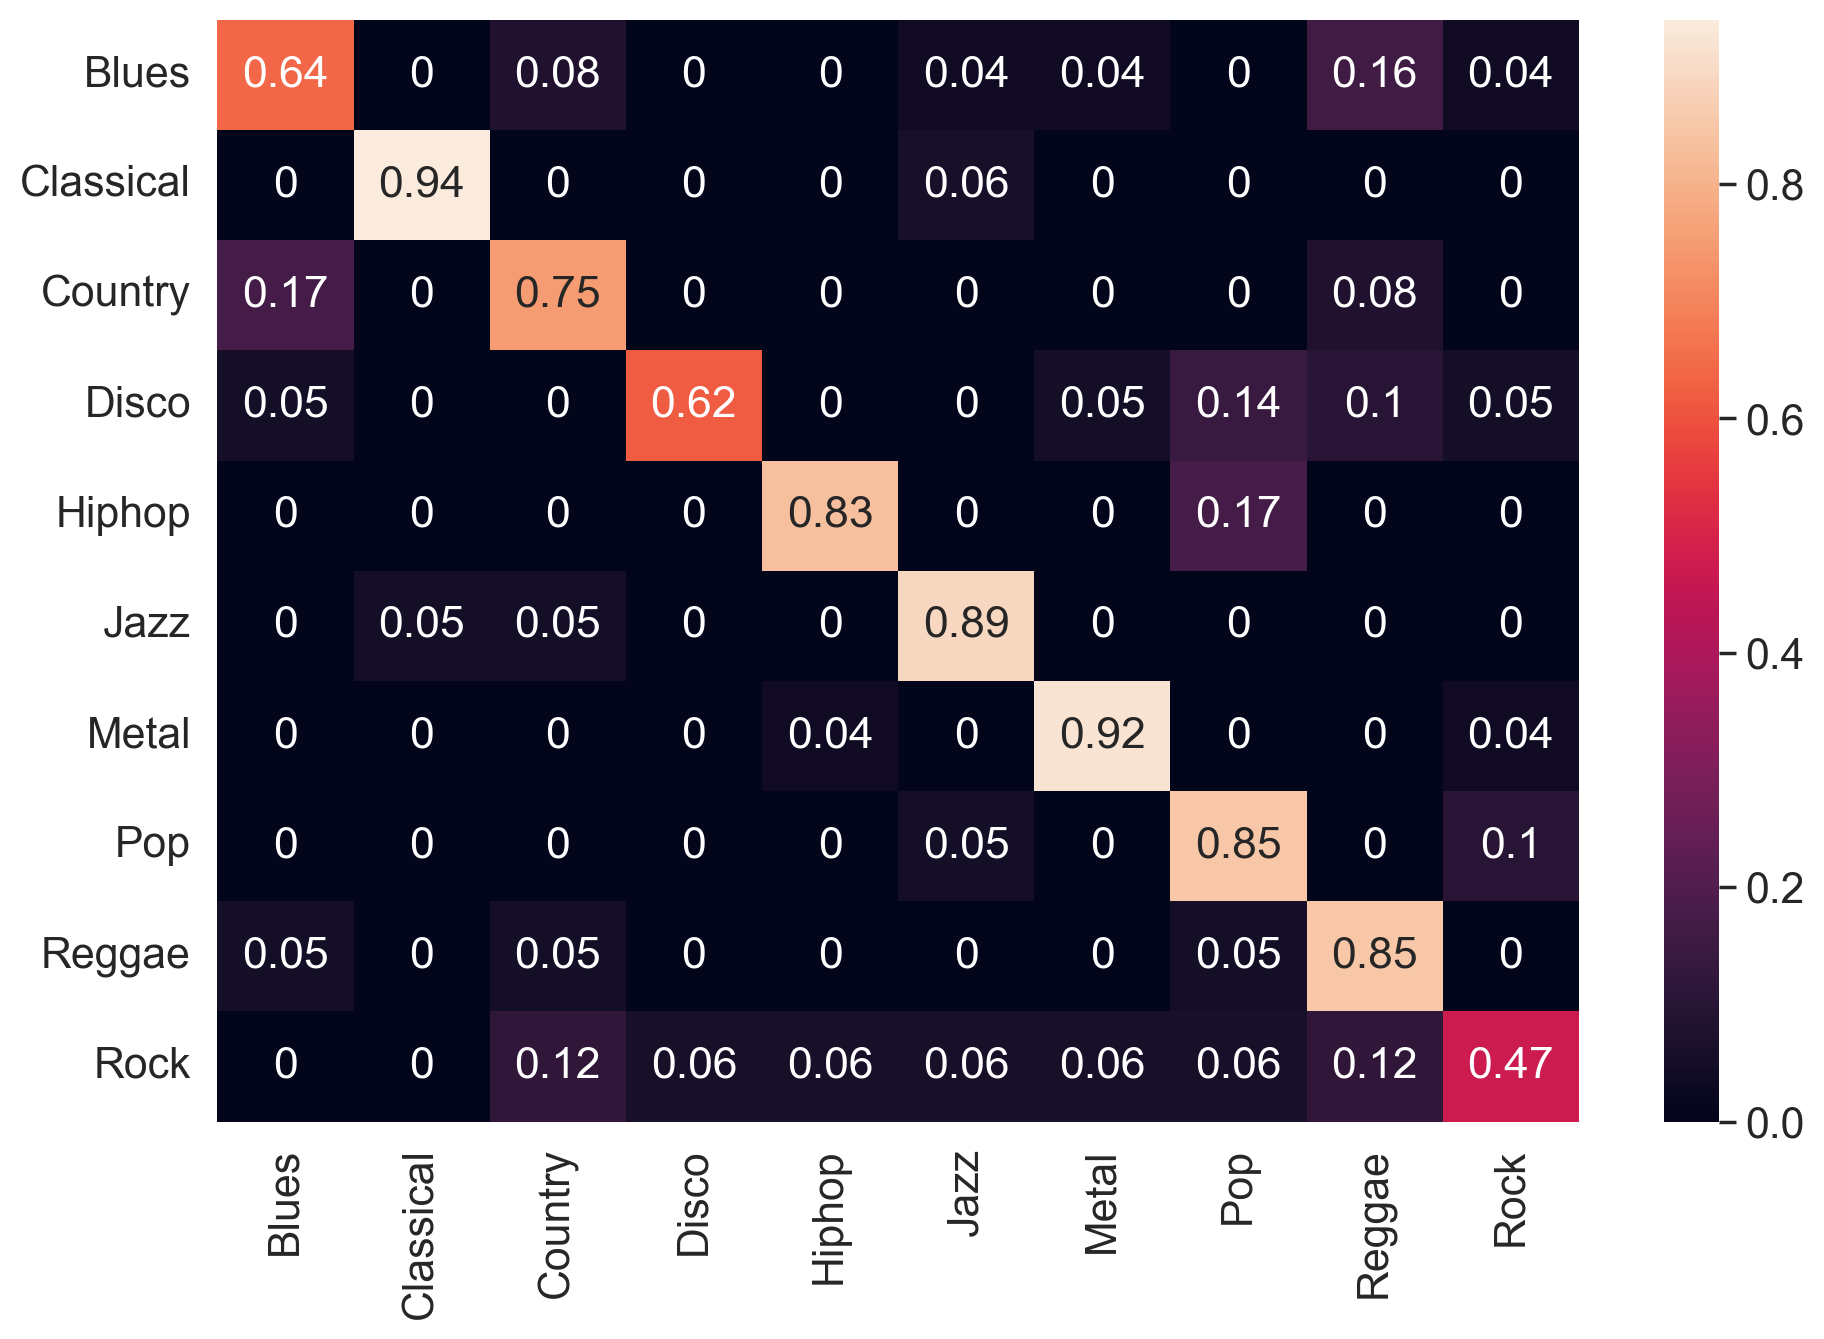

In [9]:
# Mel-Sprectrogram

# Load npz file of Mel-Spectrogram
file = np.load(os.getcwd()+"/new_mel_train_test.npz")
mel_train = file['mel_train']
mel_test = file['mel_test']
y_train = file['y_train']
y_test = file['y_test']

# Define the model
model = Sequential()
model.add(Conv2D(8, (3,3), activation= 'relu', input_shape= mel_train[0].shape, padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(16, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(32, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))
model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy')

model.summary()


# Train Model

checkpoint = ModelCheckpoint(os.getcwd()+"/models/ensemble_model_melspectrogram1_{epoch:03d}.keras")

model.fit(mel_train, y_train, epochs= 200, callbacks= [checkpoint], batch_size= 32, verbose= 1)
model.save(os.getcwd() + "/models/ensemble_model_melspectrogram1.keras")

# Load the model
model = load_model(os.getcwd() + "/models/ensemble_model_melspectrogram1.keras")


# Training Accuracy
y_pred = model.predict(mel_train)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_train, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Train Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

# Testing Accuracy
y_pred = model.predict(mel_test)
y_pred = np.argmax(y_pred, axis= -1)
y_true = np.argmax(y_test, axis= -1)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100
print("Testing Accuracy", acc)

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_true, y_pred, normalize= 'true')
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)

plt.figure(figsize = (10,7), dpi = 200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/ensemble_mel_conf_mat1.png")

In [13]:
# Load Spectrogram model 1
spec_file = np.load(os.getcwd()+"/new_spectrogram_train_test.npz")

S_train = spec_file['S_train']
S_test = spec_file['S_test']
y_train = spec_file['y_train']
y_test = spec_file['y_test']

model1 = load_model(os.getcwd() + "/models/new_spec_model_spectrogram1.keras")

# Load Spectrogram model 2
S_train = spec_file['S_train']
S_test = spec_file['S_test']
y_train = spec_file['y_train']
y_test = spec_file['y_test']

model2 = load_model(os.getcwd() + "/models/new_spec_model_spectrogram2.keras")

# Load MFCC model 1,2 and 3
mfcc_file = np.load(os.getcwd()+"/new_mfcc_train_test.npz")
mfcc_train = mfcc_file['mfcc_train']
mfcc_test = mfcc_file['mfcc_test']
y_train = mfcc_file['y_train']
y_test = mfcc_file['y_test']

model3 = load_model(os.getcwd() + "/models/new_ensemble_mfcc1.h5")
model4 = load_model(os.getcwd() + "/models/new_ensemble_mfcc2.h5")
model5 = load_model(os.getcwd() + "/models/new_ensemble_mfcc3.h5")

# Load Mel-spectrogram model
file = np.load(os.getcwd()+"/new_mel_train_test.npz")
mel_train = file['mel_train']
mel_test = file['mel_test']
y_train = file['y_train']
y_test = file['y_test']

model6 = load_model(os.getcwd() + "/models/ensemble_model_melspectrogram1.keras")

24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 773ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Training Accuracy:  755 / 755  =  100.0 %
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Testing Accuracy:  153 / 189  =  80.95 %


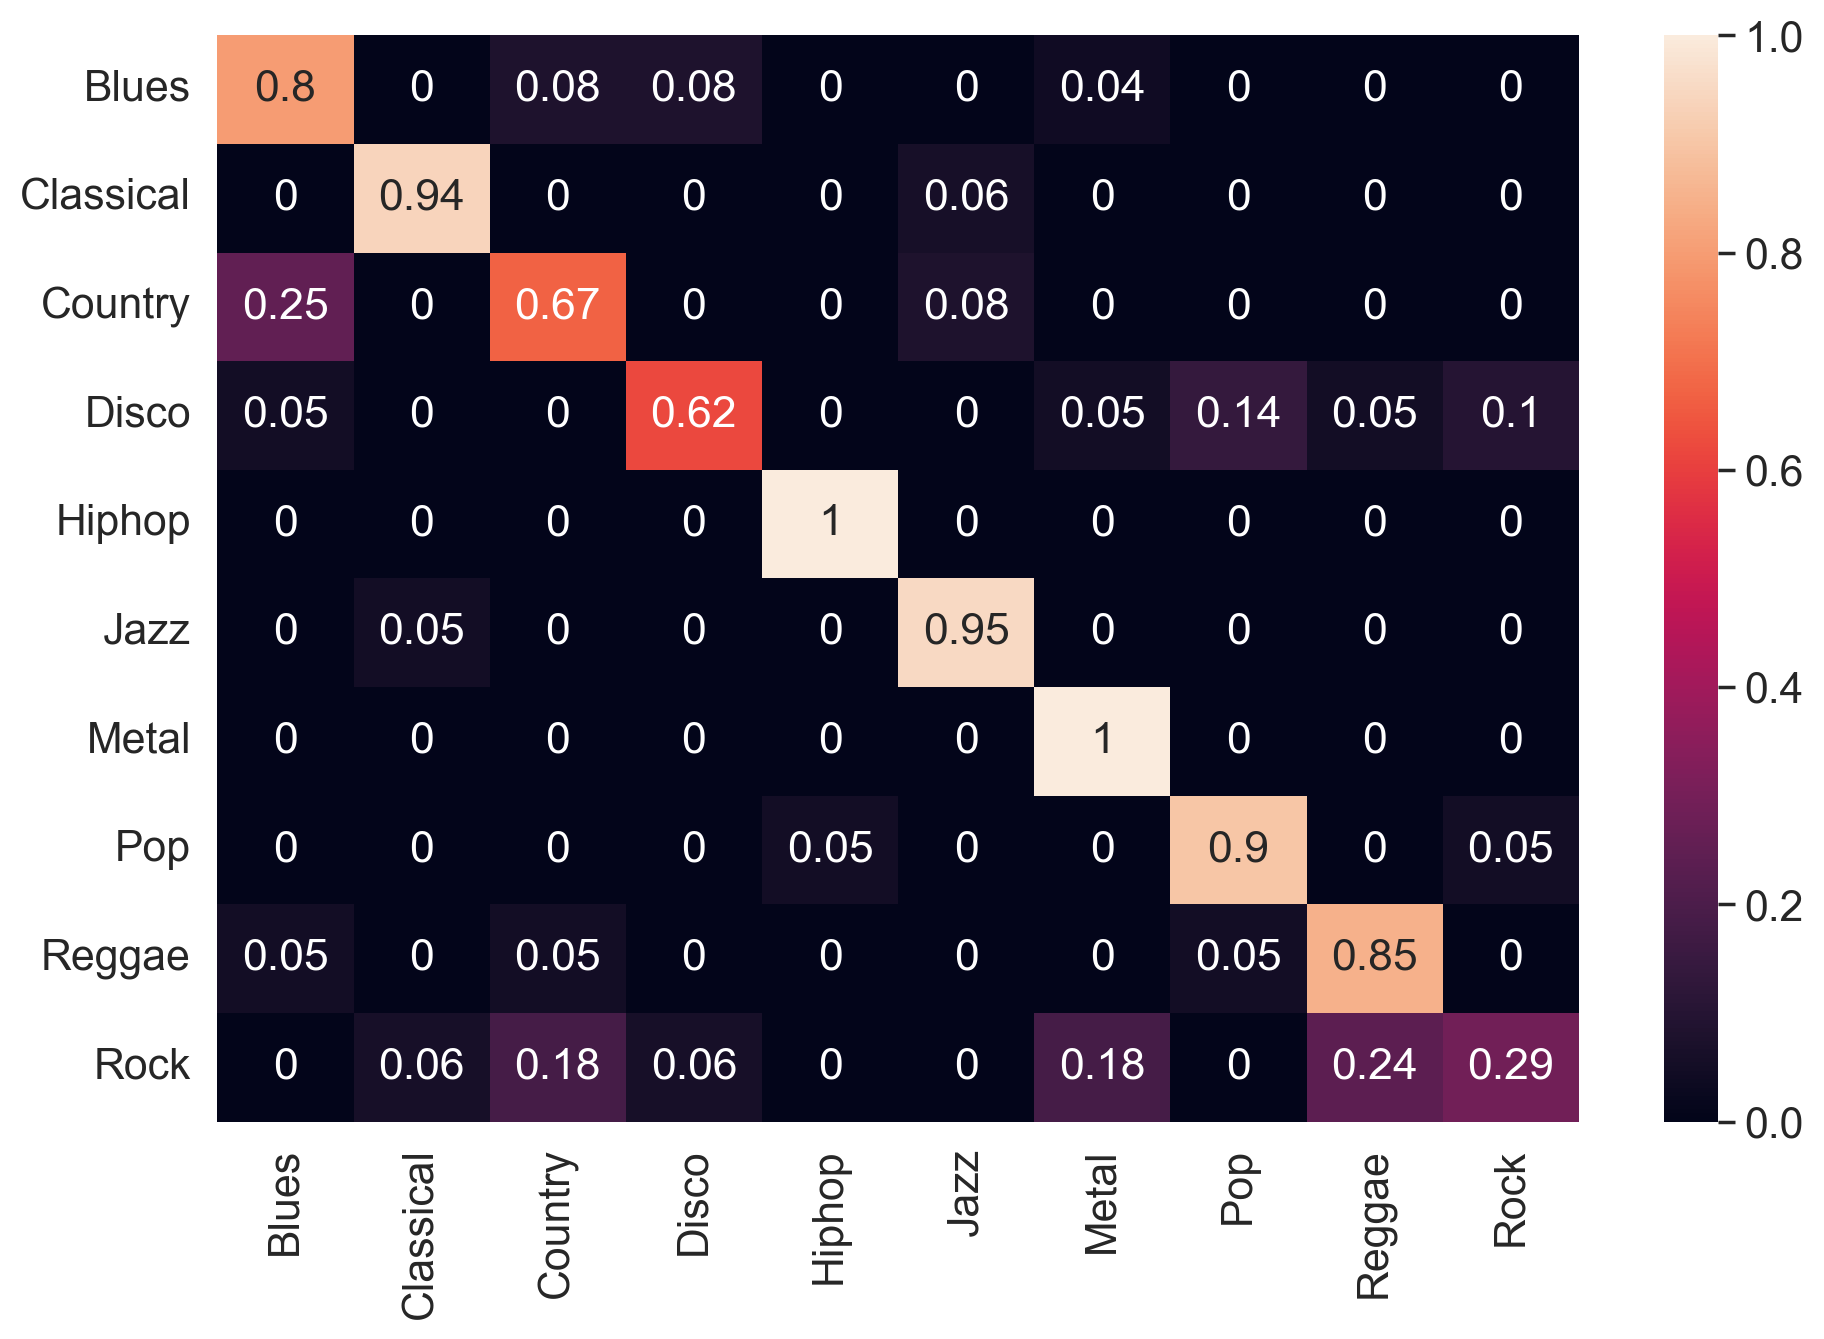

In [14]:
# Ground truth
y_true = np.argmax(y_train, axis= -1)

# Spectrogram model 1
y_pred1 = model1.predict(S_train)
y_pred1 = np.argmax(y_pred1, axis= -1)

# Spectrogram model 2
y_pred2 = model2.predict(S_train)
y_pred2 = np.argmax(y_pred2, axis= -1)

# MFCC model 1
y_pred3 = model3.predict(mfcc_train)
y_pred3 = np.argmax(y_pred3, axis= -1)

# MFCC model 2
y_pred4 = model4.predict(mfcc_train)
y_pred4 = np.argmax(y_pred4, axis= -1)

# MFCC model 3
y_pred5 = model5.predict(mfcc_train)
y_pred5 = np.argmax(y_pred5, axis= -1)

# Mel-spectrogram 
y_pred6 = model6.predict(mel_train)
y_pred6 = np.argmax(y_pred6, axis= -1)

# Get majority vote
y_pred = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
y_pred = get_majority(y_pred)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100

print("Training Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

# Test Model
y_true = np.argmax(y_test, axis= -1)
# Spectrogram model 1
y_pred1 = model1.predict(S_test)
y_pred1 = np.argmax(y_pred1, axis= -1)

# Spectrogram model 2
y_pred2 = model2.predict(S_test)
y_pred2 = np.argmax(y_pred2, axis= -1)

# MFCC model 1
y_pred3 = model3.predict(mfcc_test)
y_pred3 = np.argmax(y_pred3, axis= -1)

# MFCC model 2
y_pred4 = model4.predict(mfcc_test)
y_pred4 = np.argmax(y_pred4, axis= -1)

# MFCC model 3
y_pred5 = model5.predict(mfcc_test)
y_pred5 = np.argmax(y_pred5, axis= -1)

# Mel-Spectrogram 
y_pred6 = model6.predict(mel_test)
y_pred6 = np.argmax(y_pred6, axis= -1)

# Get majority vote
y_pred = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
y_pred = get_majority(y_pred)

correct = len(y_pred) - np.count_nonzero(y_pred - y_true)
acc = correct/ len(y_pred)
acc = np.round(acc, 4) * 100
print("Testing Accuracy: ", correct, "/", len(y_pred), " = ", acc, "%")

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_true, y_pred, normalize= 'true')
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)

plt.figure(figsize = (10,7), dpi = 200)
sn.set(font_scale=1.4)
sn.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()
plt.savefig(os.getcwd() + "/new_ensemble_conf_mat.png")